In [32]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [7]:
risk_free=0.1
sigma=0.3
S_0=100
strike=110
T=1
V_0=200
sigma_firm=0.25
debt=180
recovery_rate=0.2


In [14]:
def terminal_value(S_0, risk_free_rate,sigma,Z,T):
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)
def call_payoff(S_T,K):
    return np.maximum(S_T-K, 0)

In [15]:
np.random.seed(0)

corr_tested=np.linspace(-1,1,21)
cva_estimates=[None]*len(corr_tested)
cva_std=[None]*len(corr_tested)


In [20]:
for i in range (len(corr_tested)):
    correlation=corr_tested[i]
    if (correlation==1 or correlation==-1):
        norm_vec_0=norm.rvs(size=50000)
        norm_vec_1=correlation*norm_vec_0
        corr_norm_matrix=np.array([norm_vec_0, norm_vec_1])
    else:
        corr_matrix=np.array([[1,correlation],[correlation,1]])
        norm_matrix=norm.rvs(size=np.array([2,50000]))
        corr_norm_matrix=np.matmul(np.linalg.cholesky(corr_matrix),norm_matrix)
    term_stock_val=terminal_value(S_0,risk_free,sigma_firm,corr_norm_matrix[0,],T)
    call_val=call_payoff(term_stock_val,strike)
    term_firm_val=terminal_value(V_0,risk_free,sigma_firm,corr_norm_matrix[1,],T)
    amount_lost=np.exp(-risk_free*T)*(1-recovery_rate)*(term_firm_val<debt)*call_val
    cva_estimates[i]=np.mean(amount_lost)
    cva_std[i]=np.std(amount_lost)/np.sqrt(50000)

In [23]:
d_1=(np.log(V_0/debt)+(risk_free+sigma_firm**2/2)*(T))/(sigma_firm*np.sqrt(T))
d_2=d_1-sigma_firm*np.sqrt(T)
default_prob=norm.cdf(-d_2)

In [24]:
d_1_stock=(np.log(S_0/strike)+(risk_free+sigma**2/2)*(T))/(sigma*np.sqrt(T))
d_2_stock=d_1_stock-sigma*np.sqrt(T)
analytic_callprice=S_0*norm.cdf(d_1_stock)-strike*np.exp(-risk_free*(T))*norm.cdf(d_2_stock)

In [25]:
uncorr_cva=(1-recovery_rate)*default_prob*analytic_callprice

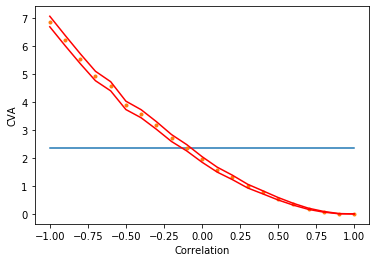

In [29]:
plt.plot(corr_tested,[uncorr_cva]*21)
plt.plot(corr_tested,cva_estimates, '.')
plt.plot(corr_tested,cva_estimates+3*np.array(cva_std), 'r')
plt.plot(corr_tested,cva_estimates-3*np.array(cva_std),'r')
plt.xlabel('Correlation')
plt.ylabel('CVA')
plt.show()